# Agglomerative Clustering

In [77]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("data/mtcars.csv")
df.head()

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  32 non-null     object 
 1   mpg           32 non-null     float64
 2   cyl           32 non-null     int64  
 3   disp          32 non-null     float64
 4   hp            32 non-null     int64  
 5   drat          32 non-null     float64
 6   wt            32 non-null     float64
 7   qsec          32 non-null     float64
 8   vs            32 non-null     int64  
 9   am            32 non-null     int64  
 10  gear          32 non-null     int64  
 11  carb          32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [80]:
df.shape

(32, 12)

In [81]:
df.manufacturer.nunique()

32

In [82]:
df = df.set_index('manufacturer')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
manufacturer,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [83]:
X = df.to_numpy()

In [84]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [85]:
linkage_matrix = linkage(X, 'ward')
linkage_matrix[0:5]

array([[ 0.        ,  1.        ,  0.61532512,  2.        ],
       [11.        , 12.        ,  0.98264948,  2.        ],
       [ 9.        , 10.        ,  1.52315462,  2.        ],
       [13.        , 33.        ,  1.99562856,  3.        ],
       [17.        , 25.        ,  5.14734155,  2.        ]])

In [86]:
linkage_matrix[0:5].astype(int)

array([[ 0,  1,  0,  2],
       [11, 12,  0,  2],
       [ 9, 10,  1,  2],
       [13, 33,  1,  3],
       [17, 25,  5,  2]])

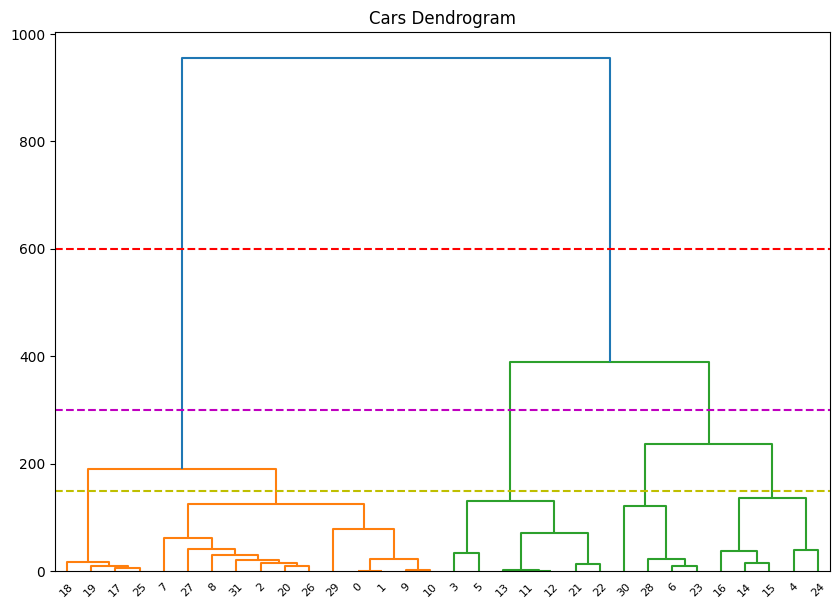

In [87]:
plt.figure(figsize=(10, 7))

dg = dendrogram(linkage_matrix)

plt.title("Cars Dendrogram")

plt.axhline(y=600, color='r', linestyle="--")
plt.axhline(y=300, color='m', linestyle="--")
plt.axhline(y=150, color='y', linestyle="--")

plt.show()

In [88]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage='ward')
model.fit(X)

AgglomerativeClustering()

In [89]:
labels = model.labels_
labels

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
score=[]

range_n_clusters = range(2, 5)

for num_clusters in range_n_clusters:
    
    # intialise Hierarchical Clustering
    hcluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    hcluster.fit(X)
    
    cluster_labels = hcluster.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    
    print(f"n_clusters={num_clusters}, silhouette score={silhouette_avg:.2f}")

n_clusters=2, silhouette score=0.61
n_clusters=3, silhouette score=0.54
n_clusters=4, silhouette score=0.57


### Clustering correlation matrix

1. Useful in scenarios when there are lot of features and we want a dendrogram visualization

In [92]:
correl_mat = df.corr()
correl_mat

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


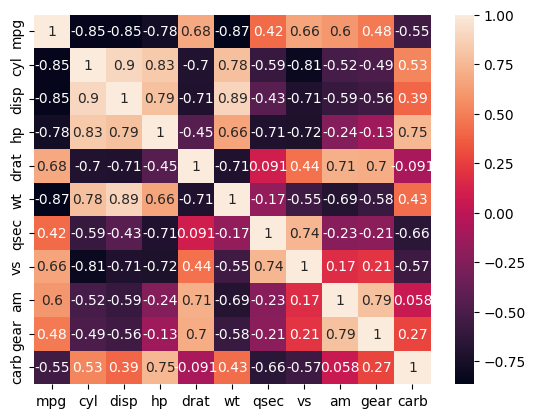

In [93]:
sns.heatmap(correl_mat, annot=True)
plt.show()

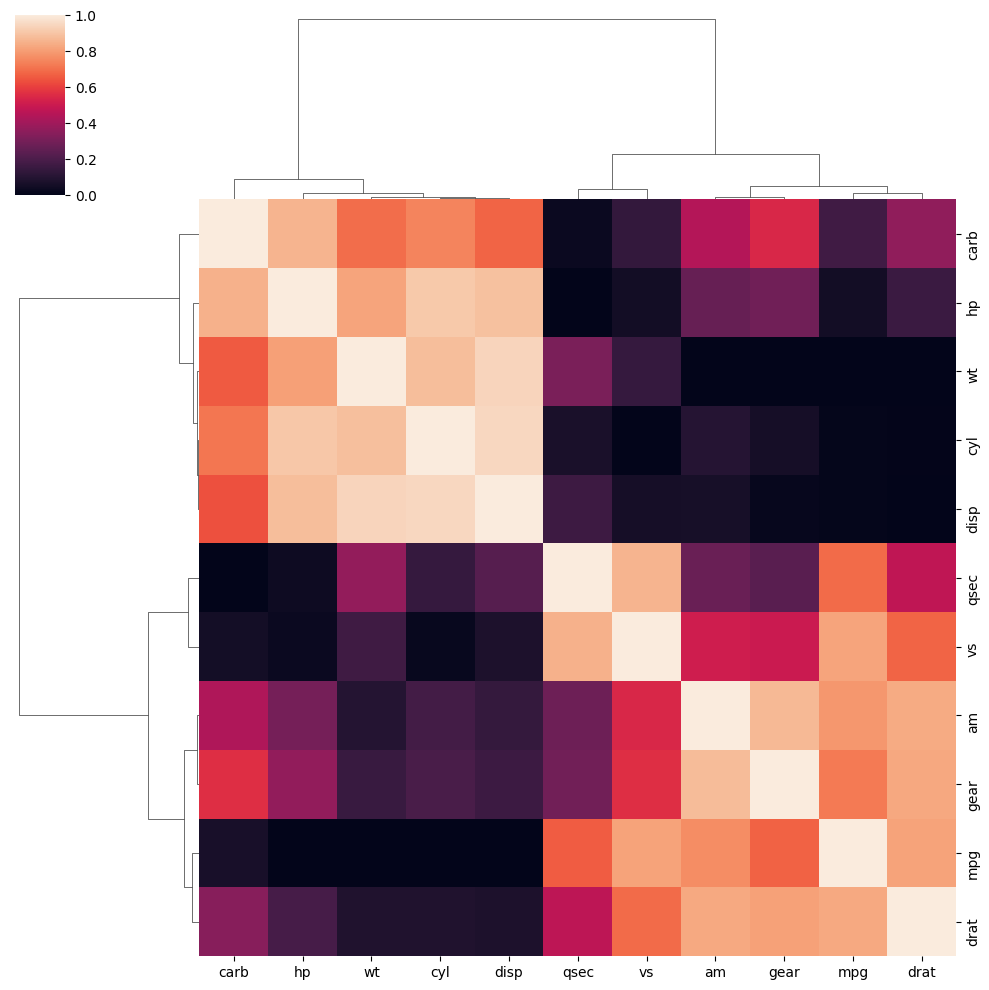

In [94]:
# plot with correlation distance
sns.clustermap(df.corr(), metric="correlation", standard_scale=1)
plt.show()

### Perform agglomerative clustering on Customer dataset

In [95]:
df = pd.read_csv("data/Customer.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [96]:
df = pd.read_csv("data/Customer.csv", index_col='ID')
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [97]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [98]:
# TODO: Drop the columns Var1 and Segmentation

df_select =  df.drop(['Var_1', 'Segmentation'], axis=1)

In [99]:
df_select.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [100]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 462809 to 467968
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 752.0+ KB


In [101]:
pd.DataFrame({'missing':df_select.isnull().sum(), 
 'percentage':(df_select.isnull().sum() / np.shape(df_select)[0]) * 100})

,missing,percentage
Gender,0,0.000000
Ever_Married,190,1.776531
Age,0,0.000000
Graduated,102,0.953717
Profession,162,1.514727
Work_Experience,1098,10.266480
Spending_Score,0,0.000000
Family_Size,448,4.188873


In [102]:
df_select = df_select.dropna()
df_select.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [103]:
# TODO: Select categorical columns 
cat_cols = df_select.select_dtypes(exclude=[float,int]).columns
cat_cols

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'], dtype='object')

In [104]:
# TODO: Perform OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_select[cat_cols])

In [105]:
enc_columns = encoder.get_feature_names_out(cat_cols)
enc_columns

array(['Gender_Female', 'Gender_Male', 'Ever_Married_No',
       'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing',
       'Spending_Score_Average', 'Spending_Score_High',
       'Spending_Score_Low'], dtype=object)

In [106]:
# convert encoded features into DataFrame 
features_enc = pd.DataFrame(encoded, columns=enc_columns)
features_enc

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8891,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8892,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8893,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8894,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
# TODO: Explain what is going on here?
df_enc = pd.concat([df_select,features_enc.set_index(df_select.index)],axis=1)
df_enc.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
ID,,,,,,,,,,,,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
461319,Male,Yes,56,No,Artist,0.0,Average,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
df_enc.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
ID,,,,,,,,,,,,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
461319,Male,Yes,56,No,Artist,0.0,Average,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [109]:
# TODO: drop original unencoded categorical columns inplace 
df_enc.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'],axis=1, inplace=True)
df_enc.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
466315,67,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
461735,67,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
461319,56,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
460156,32,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
X = df_enc.values
X

array([[22.,  1.,  4., ...,  0.,  0.,  1.],
       [67.,  1.,  1., ...,  0.,  0.,  1.],
       [67.,  0.,  2., ...,  0.,  1.,  0.],
       ...,
       [35.,  1.,  1., ...,  0.,  0.,  1.],
       [47.,  1.,  5., ...,  0.,  1.,  0.],
       [43.,  9.,  3., ...,  0.,  0.,  1.]])

In [111]:
X.shape

(8896, 21)

In [112]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [117]:
#TODO: Construct linkage matrix

from scipy.cluster.hierarchy import linkage

# TODO: Construct linkage matrix
linkage_matrix = linkage(X, method='ward')  # Replace 'X' with your data matrix

# Display the first few rows of the linkage matrix
print(linkage_matrix[:5])


[[0.000e+00 7.870e+02 0.000e+00 2.000e+00]
 [1.000e+00 5.550e+03 0.000e+00 2.000e+00]
 [2.000e+00 4.664e+03 0.000e+00 2.000e+00]
 [3.000e+00 6.618e+03 0.000e+00 2.000e+00]
 [4.000e+00 4.118e+03 0.000e+00 2.000e+00]]


[[   0  787    0    2]
 [   1 5550    0    2]
 [   2 4664    0    2]
 [   3 6618    0    2]
 [   4 4118    0    2]]


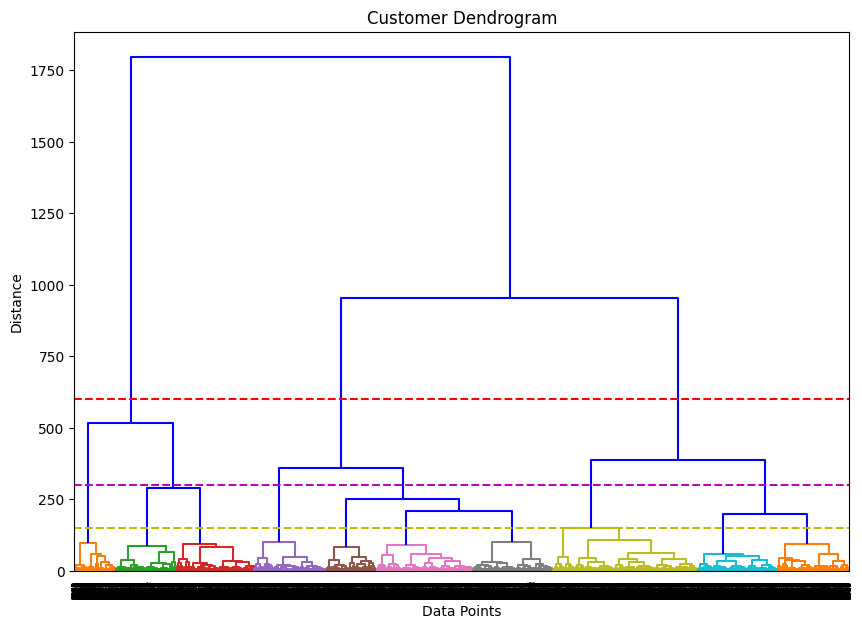

In [122]:
#TODO: Draw the dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

print(linkage_matrix[0:5].astype(int))

# Create a figure and draw the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, color_threshold=150, above_threshold_color='b')

# Add labels and titles
plt.title("Customer Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Draw horizontal lines for clustering thresholds
plt.axhline(y=600, color='r', linestyle="--")
plt.axhline(y=300, color='m', linestyle="--")
plt.axhline(y=150, color='y', linestyle="--")

plt.show()

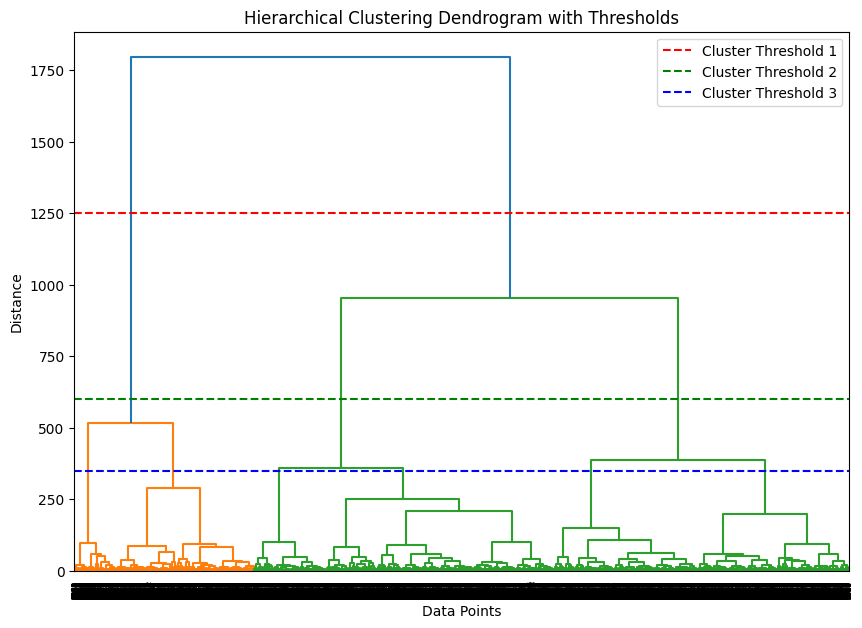

In [125]:
#TODO: Draw few  horizontal lines where you might think clustering might be good 
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# TODO: Draw the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

# TODO: Draw horizontal lines for clustering thresholds
plt.axhline(y=1250, color='r', linestyle="--", label='Cluster Threshold 1')
plt.axhline(y=600, color='g', linestyle="--", label='Cluster Threshold 2')
plt.axhline(y=350, color='b', linestyle="--", label='Cluster Threshold 3')

plt.title("Hierarchical Clustering Dendrogram with Thresholds")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.legend()  # Display a legend for the thresholds
plt.show()


In [126]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)

AgglomerativeClustering(n_clusters=3)

In [127]:
labels = model.labels_
labels

array([2, 0, 0, ..., 2, 1, 1], dtype=int64)

In [128]:
from sklearn.metrics import silhouette_score

In [129]:
score=[]

range_n_clusters = range(2, 11)

for num_clusters in range_n_clusters:
    
    # intialise Hierarchical Clustering
    hcluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    hcluster.fit(X)
    
    cluster_labels = hcluster.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    
    print(f"n_clusters={num_clusters}, silhouette score={silhouette_avg:.2f}")

n_clusters=2, silhouette score=0.56
n_clusters=3, silhouette score=0.44
n_clusters=4, silhouette score=0.43
n_clusters=5, silhouette score=0.35
n_clusters=6, silhouette score=0.32
n_clusters=7, silhouette score=0.33
n_clusters=8, silhouette score=0.35
n_clusters=9, silhouette score=0.33
n_clusters=10, silhouette score=0.33


In [130]:
results = df_enc.copy()
results['Clusters'] = labels
results.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Clusters
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
466315,67,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
461735,67,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
461319,56,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
460156,32,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
